In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from functools import reduce

## 1. import and read dataset
## 2. Dataset EdStatsData

In [2]:
df= pd.read_csv("EdStatsData.csv",sep = ',')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(886930, 70)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

### drop list of countries I get

In [6]:
list_not_country = ['Arab World',
 'Arab World',
 'Arab World',
'Macao SAR, China',
 'East Asia & Pacific',
 'East Asia & Pacific',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Euro area',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'European Union',
 'European Union',
 'Heavily indebted poor countries (HIPC)',
 'Heavily indebted poor countries (HIPC)',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'High income',
 'High income',
 'Latin America & Caribbean',
 'Latin America & Caribbean',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Least developed countries: UN classification',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low & middle income',
 'Low & middle income',
 'Low income',
 'Low income',
 'Low income',
 'Lower middle income',
 'Lower middle income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'Middle income',
 'Middle income',
 'North America',
 'North America',
 'North America',
 'OECD members',
 'OECD members',
 'OECD members',
 'South Asia',
 'South Asia',
 'South Asia',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Sub-Saharan Africa (excluding high income)',
 'Sub-Saharan Africa (excluding high income)',
 'Upper middle income',
 'Upper middle income',
 'Upper middle income',
 'World',
 'World',
 'World',
 'American Samoa',
 'American Samoa',
 'American Samoa',
 'American Samoa',
 'American Samoa',
 'American Samoa',
 'Antigua and Barbuda',
 'Aruba',
 'Aruba',
 'Bahamas, The',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'British Virgin Islands',
 'British Virgin Islands',
 'British Virgin Islands',
 'British Virgin Islands',
 'British Virgin Islands',
 'British Virgin Islands',
 'Burkina Faso',
 'Cabo Verde',
 'Cayman Islands',
 'Cayman Islands',
 'Cayman Islands',
 'Cayman Islands',
 'Central African Republic',
 'Central African Republic',
 'Channel Islands',
 'Channel Islands',
 'Channel Islands',
 'Channel Islands',
 'Channel Islands',
 'Channel Islands',
 'Comoros',
 'Comoros',
 'Congo, Dem. Rep.',
 'Curacao',
 'Curacao',
 'Curacao',
 'Curacao',
 'Curacao',
 'Curacao',
 'Curacao',
 'Egypt, Arab Rep.',
 'Egypt, Arab Rep.',
 'Equatorial Guinea',
 'Equatorial Guinea',
 'Equatorial Guinea',
 'Equatorial Guinea',
 'Ethiopia',
 'Faroe Islands',
 'Faroe Islands',
 'Faroe Islands',
 'Faroe Islands',
 'Faroe Islands',
 'Fiji',
 'Fiji',
 'Fiji',
 'French Polynesia',
 'French Polynesia',
 'French Polynesia',
 'French Polynesia',
 'French Polynesia',
 'Gambia, The',
 'Gambia, The',
 'Gambia, The',
 'Georgia',
 'Gibraltar',
 'Gibraltar',
 'Gibraltar',
 'Gibraltar',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Greenland',
 'Greenland',
 'Greenland',
 'Greenland',
 'Grenada',
 'Grenada',
 'Guam',
 'Guam',
 'Guam',
 'Guam',
 'Guam',
 'Guinea',
 'Guinea-Bissau',
 'Guinea-Bissau',
 'Guinea-Bissau',
 'Guinea-Bissau',
 'Isle of Man',
 'Isle of Man',
 'Isle of Man',
 'Isle of Man',
 'Isle of Man',
 'Isle of Man',
 'Kenya',
 'Kiribati',
 'Kiribati',
 'Kiribati',
 'Kiribati',
 'Korea, Dem. People’s Rep.',
 'Korea, Dem. People’s Rep.',
 'Korea, Dem. People’s Rep.',
 'Korea, Dem. People’s Rep.',
 'Korea, Dem. People’s Rep.',
 'Korea, Dem. People’s Rep.',
 'Liberia',
 'Liberia',
 'Liberia',
 'Liberia',
 'Libya',
 'Liechtenstein',
 'Liechtenstein',
 'Macedonia, FYR',
 'Marshall Islands',
 'Marshall Islands',
 'Marshall Islands',
 'Marshall Islands',
 'Micronesia, Fed. Sts.',
 'Micronesia, Fed. Sts.',
 'Micronesia, Fed. Sts.',
 'Micronesia, Fed. Sts.',
 'Montenegro',
 'Montenegro',
 'Montenegro',
 'Myanmar',
 'Myanmar',
 'Myanmar',
 'Nauru',
 'Nauru',
 'Nauru',
 'Nauru',
 'Nauru',
 'Nauru',
 'Nauru',
 'New Caledonia',
 'New Caledonia',
 'New Caledonia',
 'New Caledonia',
 'New Caledonia',
 'Nicaragua',
 'Northern Mariana Islands',
 'Northern Mariana Islands',
 'Northern Mariana Islands',
 'Northern Mariana Islands',
 'Northern Mariana Islands',
 'Northern Mariana Islands',
 'Palau',
 'Palau',
 'Palau',
 'Palau',
 'Palau',
 'Palau',
 'Papua New Guinea',
 'Papua New Guinea',
 'Papua New Guinea',
 'Puerto Rico',
 'Samoa',
 'Samoa',
 'San Marino',
 'San Marino',
 'San Marino',
 'San Marino',
 'Sao Tome and Principe',
 'Saudi Arabia',
 'Seychelles',
 'Seychelles',
 'Sierra Leone',
 'Sierra Leone',
 'Sint Maarten (Dutch part)',
 'Sint Maarten (Dutch part)',
 'Sint Maarten (Dutch part)',
 'Sint Maarten (Dutch part)',
 'Sint Maarten (Dutch part)',
 'Sint Maarten (Dutch part)',
 'Solomon Islands',
 'Solomon Islands',
 'South Sudan',
 'South Sudan',
 'South Sudan',
 'South Sudan',
 'South Sudan',
 'South Sudan',
 'St. Kitts and Nevis',
 'St. Kitts and Nevis',
 'St. Lucia',
 'St. Martin (French part)',
 'St. Martin (French part)',
 'St. Martin (French part)',
 'St. Martin (French part)',
 'St. Martin (French part)',
 'St. Martin (French part)',
 'St. Martin (French part)',
 'St. Vincent and the Grenadines',
 'St. Vincent and the Grenadines',
 'Tanzania',
 'Tanzania',
 'Timor-Leste',
 'Timor-Leste',
 'Timor-Leste',

 'Turks and Caicos Islands',
 'Turks and Caicos Islands',
 'Turks and Caicos Islands',
 'Turks and Caicos Islands',
 'Turks and Caicos Islands',
 'Tuvalu',
 'Tuvalu',
 'Tuvalu',
 'Tuvalu',
 'Uganda',
 'Uganda',
 'Vanuatu',
 'Vanuatu',
 'Vanuatu',
 'Vanuatu',
 'Virgin Islands (U.S.)',
 'Virgin Islands (U.S.)',
 'Virgin Islands (U.S.)',
 'Virgin Islands (U.S.)',
 'West Bank and Gaza',
]


In [7]:
df = df[df["Country Name"].isin(list_not_country) == False]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538755 entries, 91625 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    538755 non-null  object 
 1   Country Code    538755 non-null  object 
 2   Indicator Name  538755 non-null  object 
 3   Indicator Code  538755 non-null  object 
 4   1970            58335 non-null   float64
 5   1971            24442 non-null   float64
 6   1972            24460 non-null   float64
 7   1973            24825 non-null   float64
 8   1974            25061 non-null   float64
 9   1975            70530 non-null   float64
 10  1976            26485 non-null   float64
 11  1977            26500 non-null   float64
 12  1978            26152 non-null   float64
 13  1979            25519 non-null   float64
 14  1980            71492 non-null   float64
 15  1981            26867 non-null   float64
 16  1982            26012 non-null   float64
 17  1983  

## merge with EdStats Country to get other informations

In [9]:

df_edstats_country = pd.read_csv("EdStatsCountry.csv", sep = ',')
pd.set_option('display.max_columns', None)
df_edstats_country.head(3)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN


In [10]:
data = pd.merge(df,df_edstats_country[["Country Code","Region","Income Group","Latest population census"]])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538755 entries, 0 to 538754
Data columns (total 73 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Country Name              538755 non-null  object 
 1   Country Code              538755 non-null  object 
 2   Indicator Name            538755 non-null  object 
 3   Indicator Code            538755 non-null  object 
 4   1970                      58335 non-null   float64
 5   1971                      24442 non-null   float64
 6   1972                      24460 non-null   float64
 7   1973                      24825 non-null   float64
 8   1974                      25061 non-null   float64
 9   1975                      70530 non-null   float64
 10  1976                      26485 non-null   float64
 11  1977                      26500 non-null   float64
 12  1978                      26152 non-null   float64
 13  1979                      25519 non-null   f

### keep data between 2000 and 2015

In [12]:
df_new = data[data.columns[data.columns.isin(["Country Name","Country Code","Indicator Name","Indicator Code","Income Group","Region",'Latest population census',"2000","2001","2002","2003",'2004',"2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015"])]]

In [13]:
df_new.shape

(538755, 23)

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538755 entries, 0 to 538754
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Country Name              538755 non-null  object 
 1   Country Code              538755 non-null  object 
 2   Indicator Name            538755 non-null  object 
 3   Indicator Code            538755 non-null  object 
 4   2000                      137197 non-null  float64
 5   2001                      91518 non-null   float64
 6   2002                      91220 non-null   float64
 7   2003                      96352 non-null   float64
 8   2004                      94574 non-null   float64
 9   2005                      143754 non-null  float64
 10  2006                      107460 non-null  float64
 11  2007                      102927 non-null  float64
 12  2008                      99974 non-null   float64
 13  2009                      106764 non-null  f

## create dataframe with the good indicator

In [15]:
indicator_list = ["Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary",
                  "Enrolment in secondary education","Enrolment in tertiary education",
                  "Percentage of enrolment in tertiary education in private institutions (%)",
                 "Percentage of enrolment in secondary education in private institutions (%)",
                  "Percentage of enrolment in upper secondary education in private institutions (%)",
                 "GDP per capita","Internet users (per 100 people)",
                  "Personal computers (per 100 people)"]

In [16]:
df_indicator = df_new[df_new['Indicator Name'].isin(indicator_list)]## select list of indicator

In [17]:
df_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 377 to 537174
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              882 non-null    object 
 1   Country Code              882 non-null    object 
 2   Indicator Name            882 non-null    object 
 3   Indicator Code            882 non-null    object 
 4   2000                      609 non-null    float64
 5   2001                      498 non-null    float64
 6   2002                      527 non-null    float64
 7   2003                      509 non-null    float64
 8   2004                      523 non-null    float64
 9   2005                      655 non-null    float64
 10  2006                      491 non-null    float64
 11  2007                      450 non-null    float64
 12  2008                      452 non-null    float64
 13  2009                      432 non-null    float64
 14  2010 

In [18]:
df_indicator.shape

(882, 23)

In [19]:
df_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 377 to 537174
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              882 non-null    object 
 1   Country Code              882 non-null    object 
 2   Indicator Name            882 non-null    object 
 3   Indicator Code            882 non-null    object 
 4   2000                      609 non-null    float64
 5   2001                      498 non-null    float64
 6   2002                      527 non-null    float64
 7   2003                      509 non-null    float64
 8   2004                      523 non-null    float64
 9   2005                      655 non-null    float64
 10  2006                      491 non-null    float64
 11  2007                      450 non-null    float64
 12  2008                      452 non-null    float64
 13  2009                      432 non-null    float64
 14  2010 

# Filter data by indicator

## 1)internet indicator

In [161]:
df_indicator["Indicator Name"].value_counts()

Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary    147
Internet users (per 100 people)                                                              147
Percentage of enrolment in secondary education in private institutions (%)                   147
Percentage of enrolment in tertiary education in private institutions (%)                    147
Percentage of enrolment in upper secondary education in private institutions (%)             147
Personal computers (per 100 people)                                                          147
Name: Indicator Name, dtype: int64

In [162]:
df_internet = df_indicator.loc[df_indicator["Indicator Name"] == "Internet users (per 100 people)"] # create dataframe with one indicator

In [163]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 1375 to 536465
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              147 non-null    object 
 1   Country Code              147 non-null    object 
 2   Indicator Name            147 non-null    object 
 3   Indicator Code            147 non-null    object 
 4   2000                      142 non-null    float64
 5   2001                      143 non-null    float64
 6   2002                      143 non-null    float64
 7   2003                      138 non-null    float64
 8   2004                      140 non-null    float64
 9   2005                      142 non-null    float64
 10  2006                      141 non-null    float64
 11  2007                      146 non-null    float64
 12  2008                      145 non-null    float64
 13  2009                      145 non-null    float64
 14  2010

In [164]:
df_internet.isnull().sum()/df_internet.shape[0]*100  # percentage of null in every column

Country Name                0.000000
Country Code                0.000000
Indicator Name              0.000000
Indicator Code              0.000000
2000                        3.401361
2001                        2.721088
2002                        2.721088
2003                        6.122449
2004                        4.761905
2005                        3.401361
2006                        4.081633
2007                        0.680272
2008                        1.360544
2009                        1.360544
2010                        1.360544
2011                        0.680272
2012                        0.680272
2013                        0.680272
2014                        0.680272
2015                        0.680272
Region                      0.000000
Income Group                0.000000
Latest population census    0.000000
dtype: float64

In [165]:
df_internet.describe()## check the mean of all the years

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,142.000000,143.000000,143.000000,138.000000,140.000000,142.000000,141.000000,146.000000,145.000000,145.000000,145.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,9.672083,11.830895,14.870255,17.878816,20.395245,22.789013,25.654336,28.010874,30.897794,33.756970,37.225226,39.782979,42.710167,45.663415,48.535015,51.566890
std,14.214875,16.535559,19.737521,21.963572,23.453550,24.764651,25.825511,26.856142,27.694115,28.248919,28.438519,28.684581,29.026133,29.312438,28.911818,28.250325
min,0.020000,0.004723,0.004561,0.064584,0.077480,0.221341,0.294034,0.390391,0.470000,0.530000,0.610000,0.700000,0.800000,0.900000,0.990000,1.083733
25%,0.402067,0.621841,1.082941,1.714867,2.550391,3.394921,4.506125,5.771822,6.850000,8.100000,11.040000,12.349998,15.700000,17.724988,21.250000,25.654245
50%,2.810713,3.617291,4.999714,7.322333,8.932777,11.483604,15.341675,19.220000,23.000000,27.400000,31.600000,37.719307,40.650948,44.550000,48.450000,53.980373
75%,10.539002,15.211631,21.545000,28.525000,31.967500,38.309174,44.580000,48.482016,55.220000,58.970000,63.000000,66.942500,69.062494,71.576250,73.966284,75.390180
max,52.000000,64.000000,79.120000,83.140000,83.890000,87.000000,89.510000,90.600000,91.000000,93.000000,93.390000,94.819687,96.209800,96.546800,98.160000,98.323610


In [166]:
df_internet_mean = df_internet.groupby("Country Name").mean() 
## group by country name and create a new dataframe with mean values

In [167]:
df_internet_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, Afghanistan to Zimbabwe
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    142 non-null    float64
 1   2001    143 non-null    float64
 2   2002    143 non-null    float64
 3   2003    138 non-null    float64
 4   2004    140 non-null    float64
 5   2005    142 non-null    float64
 6   2006    141 non-null    float64
 7   2007    146 non-null    float64
 8   2008    145 non-null    float64
 9   2009    145 non-null    float64
 10  2010    145 non-null    float64
 11  2011    146 non-null    float64
 12  2012    146 non-null    float64
 13  2013    146 non-null    float64
 14  2014    146 non-null    float64
 15  2015    146 non-null    float64
dtypes: float64(16)
memory usage: 19.5+ KB


### check the evolution by country over year for mean of the 10 first countries

In [168]:
df_internet_mean.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015'],ascending= False).head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,
Norway,52.000000,64.000000,72.840000,78.13000,77.690000,81.990000,82.55,86.93,90.57,92.08,93.39,93.489983,94.649978,95.053400,96.30,96.810300
Canada,51.300000,60.200000,61.593299,64.20000,65.955963,71.660000,72.40,73.20,76.70,80.30,80.30,83.000000,83.000000,85.800000,87.12,88.470000
New Zealand,47.379557,53.241015,59.080753,60.96254,61.847628,62.720212,69.00,69.76,72.03,79.70,80.46,81.230000,81.644470,82.780000,85.50,88.222889
Switzerland,47.100000,55.100000,61.400000,65.10000,67.800000,70.100000,75.70,77.20,79.20,81.30,83.90,85.193028,85.200000,86.340000,87.40,87.479056
Australia,46.756116,52.689266,NaN,NaN,NaN,63.000000,66.00,69.45,71.67,74.25,76.00,79.487698,79.000000,83.453497,84.00,84.560519


In [169]:
df_internet_mean["mean internet"] = df_internet_mean.sum(axis = 1) # create one column with the sum of all mean years 

In [170]:
df_internet_mean.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,mean internet
Country Name,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.004723,0.004561,0.087891,0.105809,1.224148,2.107124,1.900000,1.84,3.55,4.0,5.0,5.454545,5.9,7.0,8.260000,46.438801
Albania,0.114097,0.325798,0.390081,0.971900,2.420388,6.043891,9.609991,15.036115,23.86,41.20,45.0,49.0,54.655959,57.2,60.1,63.252933,429.181155
Algeria,0.491706,0.646114,1.591641,2.195360,4.634475,5.843942,7.375985,9.451191,10.18,11.23,12.5,14.9,18.200000,22.5,29.5,38.200000,189.440413
Andorra,10.538836,NaN,11.260469,13.546413,26.837954,37.605766,48.936847,70.870000,70.04,78.53,81.0,81.0,86.434425,94.0,95.9,96.910000,903.410709
Angola,0.105046,0.136014,0.270377,0.370682,0.464815,1.143367,1.500000,1.700000,1.90,2.30,2.8,3.1,6.500000,8.9,10.2,12.400000,53.790300


In [171]:
df_internet_mean = df_internet_mean.reset_index(level = 0) 
## transform the index to a column name to use it later for sorting values by values of each country

In [172]:
df_internet_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   147 non-null    object 
 1   2000           142 non-null    float64
 2   2001           143 non-null    float64
 3   2002           143 non-null    float64
 4   2003           138 non-null    float64
 5   2004           140 non-null    float64
 6   2005           142 non-null    float64
 7   2006           141 non-null    float64
 8   2007           146 non-null    float64
 9   2008           145 non-null    float64
 10  2009           145 non-null    float64
 11  2010           145 non-null    float64
 12  2011           146 non-null    float64
 13  2012           146 non-null    float64
 14  2013           146 non-null    float64
 15  2014           146 non-null    float64
 16  2015           146 non-null    float64
 17  mean internet  147 non-null    float64
dtypes: float64

## check evolution of indicator internet per year for 5 first countries

In [173]:
x = df_internet_mean.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015'],ascending= False).columns[1:]
y = df_internet_mean.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015'],ascending= False).iloc[0][1:]
country = df_internet_mean.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015'],ascending= False).iloc[0][0]

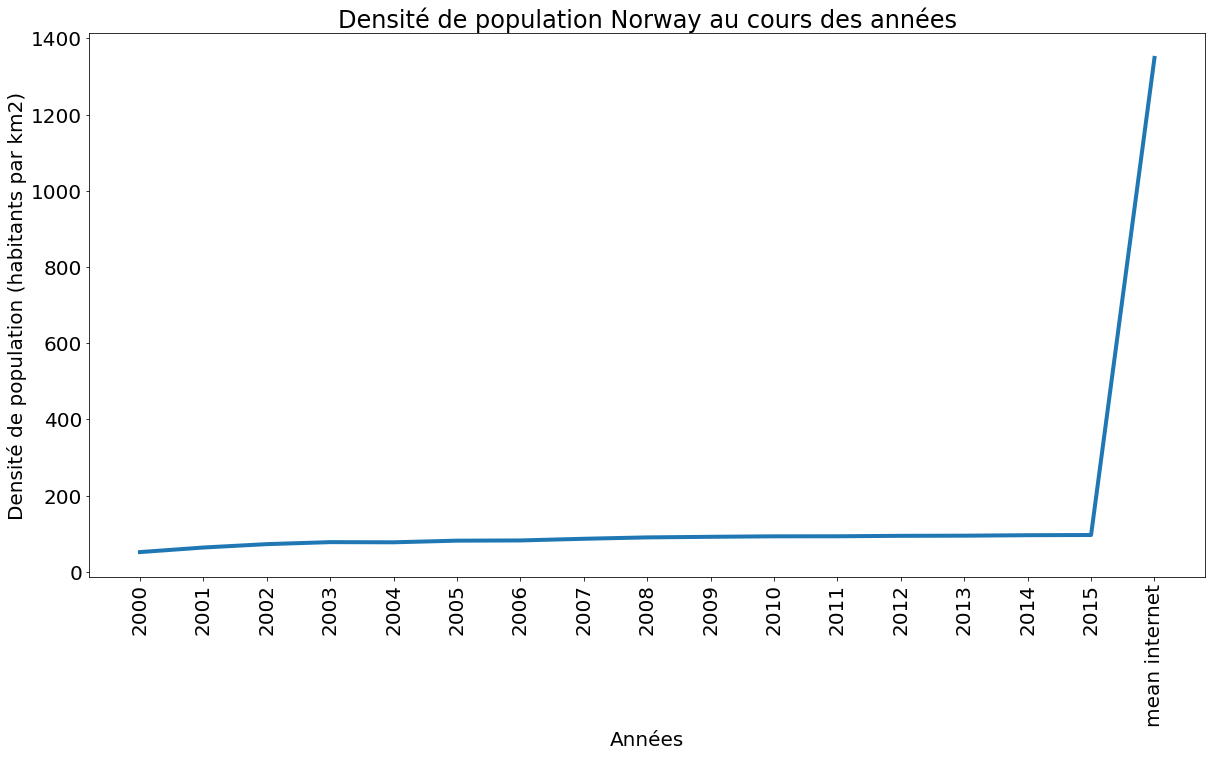

In [174]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = '20'
plt.title('Densité de population ' + country + ' au cours des années')
plt.xlabel('Années')
plt.xticks(rotation = '90')
plt.ylabel('Densité de population (habitants par km2)')
plt.plot(x, y, linewidth = 4)

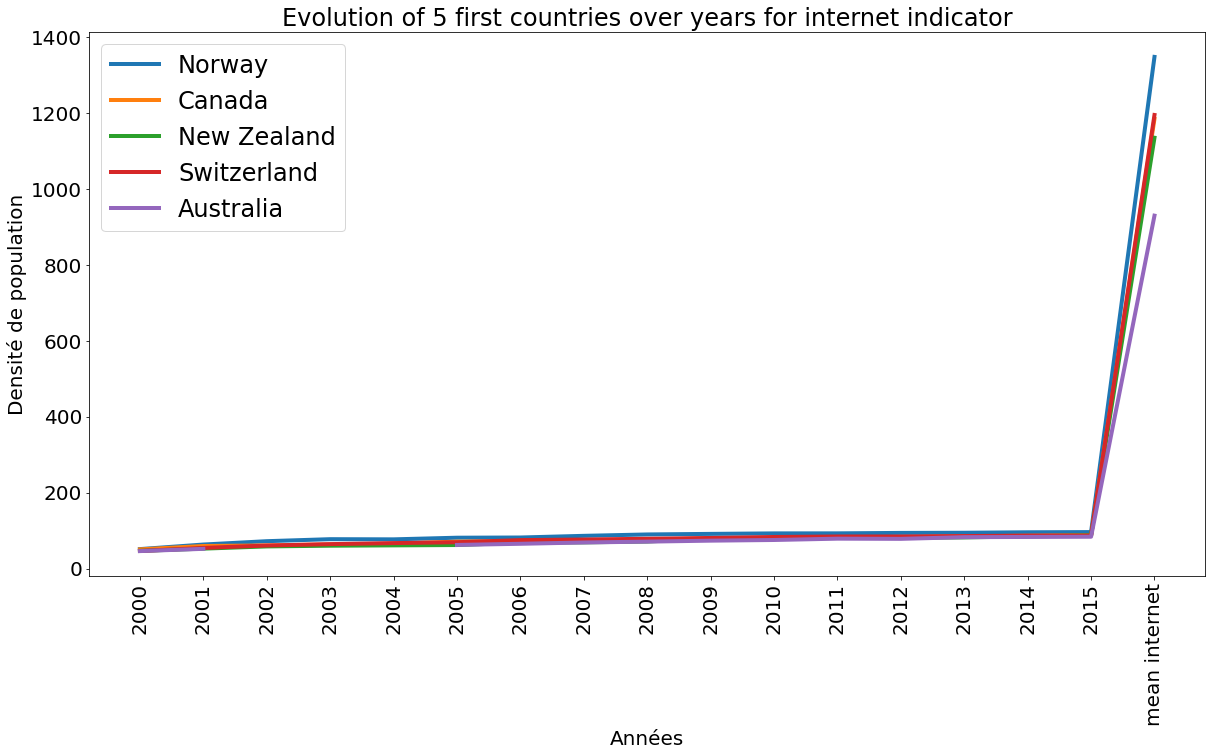

In [175]:
for index in range(5):
    y = df_internet_mean.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015'],ascending=False).iloc[index][1:]
    plt.plot(x, 
             y, 
             label = df_internet_mean.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015'],ascending=False).iloc[index][0],
             linewidth = 4)
    plt.title('Evolution of 5 first countries over years for internet indicator')
    plt.xlabel('Années')
    plt.xticks(rotation = '90')
    plt.ylabel('Densité de population')
    plt.legend(prop = {'size': 24})

In [176]:
df_internet_mean = df_internet_mean.drop(columns=['2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015'], axis = 0)

In [177]:
df_internet_mean.sort_values("mean internet", ascending= False).head(10)
# sort values and check the ten firt and ten last countries

,Country Name,mean internet
58,Iceland,1368.439816
100,Norway,1348.473661
125,Sweden,1320.507091
39,Denmark,1287.590181
96,Netherlands,1267.434606
47,Finland,1215.420744
70,"Korea, Rep.",1205.404577
126,Switzerland,1195.512084
17,Bermuda,1189.520266
27,Canada,1185.199263


In [178]:
df_internet_mean.sort_values("mean internet", ascending= False).tail(10)

,Country Name,mean internet
130,Togo,44.220000
81,Malawi,34.796457
84,Mali,34.545363
80,Madagascar,23.586479
28,Chad,20.046468
24,Burundi,15.301990
118,Somalia,14.764084
98,Niger,12.643918
45,Eritrea,7.025350
71,Kosovo,0.000000


## 2)Personal computers 

In [179]:
df_computer = df_indicator.loc[df_indicator["Indicator Name"] == "Personal computers (per 100 people)"]#create dataframe with one indicator

In [180]:
df_computer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 2084 to 537174
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              147 non-null    object 
 1   Country Code              147 non-null    object 
 2   Indicator Name            147 non-null    object 
 3   Indicator Code            147 non-null    object 
 4   2000                      129 non-null    float64
 5   2001                      137 non-null    float64
 6   2002                      136 non-null    float64
 7   2003                      133 non-null    float64
 8   2004                      133 non-null    float64
 9   2005                      129 non-null    float64
 10  2006                      82 non-null     float64
 11  2007                      39 non-null     float64
 12  2008                      25 non-null     float64
 13  2009                      3 non-null      float64
 14  2010

In [181]:
df_computer.isnull().sum()/df_computer.shape[0]*100  # percentage of null in every column

Country Name                  0.000000
Country Code                  0.000000
Indicator Name                0.000000
Indicator Code                0.000000
2000                         12.244898
2001                          6.802721
2002                          7.482993
2003                          9.523810
2004                          9.523810
2005                         12.244898
2006                         44.217687
2007                         73.469388
2008                         82.993197
2009                         97.959184
2010                        100.000000
2011                        100.000000
2012                        100.000000
2013                        100.000000
2014                        100.000000
2015                        100.000000
Region                        0.000000
Income Group                  0.000000
Latest population census      0.000000
dtype: float64

In [182]:
# drop column with more then 50 % null values
df_computer = df_computer.drop(['2007','2008','2009','2015','2014','2013','2012','2011','2010'], axis = 1)

In [183]:
df_computer.describe()

,2000,2001,2002,2003,2004,2005,2006
count,129.000000,137.000000,136.000000,133.000000,133.000000,129.000000,82.000000
mean,11.496670,11.953229,12.644372,14.025585,15.625680,17.340580,24.310784
std,15.662575,16.638292,17.394483,18.567916,20.964991,23.081987,27.232820
min,0.045497,0.052648,0.059235,0.065285,0.070817,0.075851,0.289827
25%,0.923158,0.967256,1.154334,1.598189,1.733306,1.856963,3.760417
50%,3.951626,3.796295,4.097273,4.892251,5.539629,6.723665,12.707212
75%,14.337032,14.660700,15.552366,18.326725,19.317890,21.668920,39.545342
max,65.591332,68.603650,71.255847,74.495008,83.122328,87.728023,94.446705


In [184]:
df_computer_mean = df_computer.groupby("Country Name").mean()
# group by country name and create a new data frame

In [185]:
df_computer_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, Afghanistan to Zimbabwe
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    129 non-null    float64
 1   2001    137 non-null    float64
 2   2002    136 non-null    float64
 3   2003    133 non-null    float64
 4   2004    133 non-null    float64
 5   2005    129 non-null    float64
 6   2006    82 non-null     float64
dtypes: float64(7)
memory usage: 9.2+ KB


In [186]:
df_computer_mean["mean computer"] = df_computer_mean.sum(axis = 1) 
# create a new column with mean values of all years for each country

In [187]:
df_computer_mean = df_computer_mean.reset_index(level = 0)# transform country name as column

In [188]:
df_computer_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   147 non-null    object 
 1   2000           129 non-null    float64
 2   2001           137 non-null    float64
 3   2002           136 non-null    float64
 4   2003           133 non-null    float64
 5   2004           133 non-null    float64
 6   2005           129 non-null    float64
 7   2006           82 non-null     float64
 8   mean computer  147 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.5+ KB


## check evolution of indicator personel computer per year for 5 first countries

In [189]:
x = df_computer_mean.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006'],ascending= False).columns[1:]
#y = df_computer_mean.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006'],ascending= False).iloc[0][1:]
#country = df_computer_mean.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006'],ascending= False).iloc[0][0]

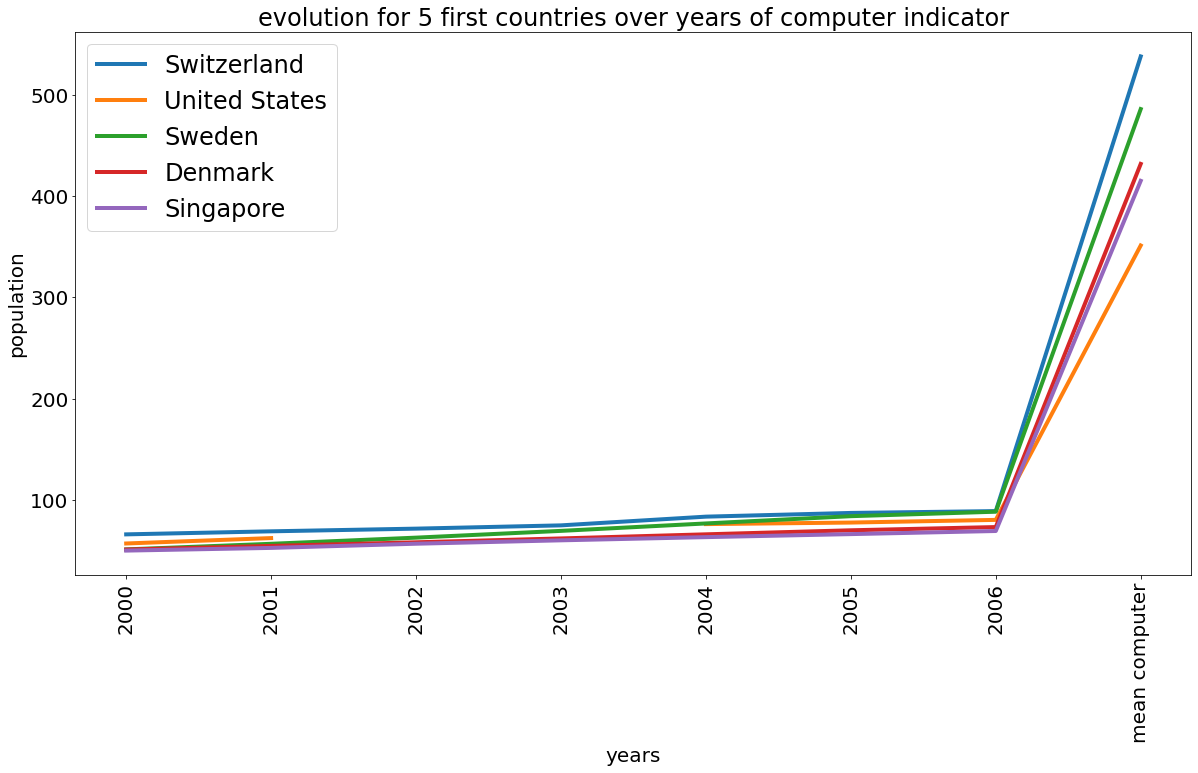

In [190]:
for index in range(5):
    y = df_computer_mean.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006'],
                                     ascending=False).iloc[index][1:]
    plt.plot(x, 
             y, 
             label = df_computer_mean.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005','2006'],
                                                  ascending=False).iloc[index][0],
             linewidth = 4)
    plt.title('evolution for 5 first countries over years of computer indicator')
    plt.xlabel('years')
    plt.xticks(rotation = '90')
    plt.ylabel('population')
    plt.legend(prop = {'size': 24})

In [191]:
## keep just column for mean of all years
df_computer_mean = df_computer_mean.drop(columns=['2000', '2001', '2002', '2003', '2005', '2006'], axis = 0)

In [192]:
df_computer_mean = df_computer_mean.drop(columns=['2004'], axis = 1)

In [193]:
df_computer_mean.sort_values("mean computer", ascending= False).head(10)

,Country Name,mean computer
126,Switzerland,538.469791
125,Sweden,486.358903
27,Canada,441.269629
39,Denmark,432.111960
96,Netherlands,426.396817
115,Singapore,415.373821
79,Luxembourg,415.171364
100,Norway,387.544143
138,United Kingdom,371.244743
56,"Hong Kong SAR, China",364.844874


In [194]:
df_computer_mean.sort_values("mean computer", ascending= False).tail(10)

,Country Name,mean computer
54,Haiti,0.821852
13,Belarus,0.817567
81,Malawi,0.815334
62,Iraq,0.792447
0,Afghanistan,0.732051
98,Niger,0.369332
69,Kazakhstan,0.000000
71,Kosovo,0.000000
3,Andorra,0.000000
90,Monaco,0.000000


## 3)Percentage of enrolment in upper secondary education in private institutions 

In [195]:
df_indicator["Indicator Name"].value_counts()

Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary    147
Internet users (per 100 people)                                                              147
Percentage of enrolment in secondary education in private institutions (%)                   147
Percentage of enrolment in tertiary education in private institutions (%)                    147
Percentage of enrolment in upper secondary education in private institutions (%)             147
Personal computers (per 100 people)                                                          147
Name: Indicator Name, dtype: int64

In [196]:
# create datframe with one indicator
df_upper_private = df_indicator.loc[df_indicator["Indicator Name"] == "Percentage of enrolment in upper secondary education in private institutions (%)"]

In [197]:
df_upper_private.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 1858 to 536948
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              147 non-null    object 
 1   Country Code              147 non-null    object 
 2   Indicator Name            147 non-null    object 
 3   Indicator Code            147 non-null    object 
 4   2000                      78 non-null     float64
 5   2001                      82 non-null     float64
 6   2002                      92 non-null     float64
 7   2003                      88 non-null     float64
 8   2004                      91 non-null     float64
 9   2005                      94 non-null     float64
 10  2006                      99 non-null     float64
 11  2007                      98 non-null     float64
 12  2008                      101 non-null    float64
 13  2009                      100 non-null    float64
 14  2010

In [198]:
df_upper_private.isnull().sum()/df_upper_private.shape[0]*100  # percentage of null in every column

Country Name                 0.000000
Country Code                 0.000000
Indicator Name               0.000000
Indicator Code               0.000000
2000                        46.938776
2001                        44.217687
2002                        37.414966
2003                        40.136054
2004                        38.095238
2005                        36.054422
2006                        32.653061
2007                        33.333333
2008                        31.292517
2009                        31.972789
2010                        27.210884
2011                        23.809524
2012                        27.210884
2013                        25.850340
2014                        41.496599
2015                        97.959184
Region                       0.000000
Income Group                 0.000000
Latest population census     0.000000
dtype: float64

In [199]:
# drop 2015 column over 50 % of null values
df_upper_private = df_upper_private.drop(['2015'], axis = 1)

In [200]:
df_upper_private.describe()## check the mean of all the years

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,78.000000,82.000000,92.000000,88.000000,91.000000,94.000000,99.000000,98.000000,101.000000,100.000000,107.000000,112.000000,107.000000,109.000000,86.000000
mean,16.950716,18.545831,18.347788,16.480284,17.563186,18.015857,20.017381,19.562842,19.368780,20.070427,19.612231,19.661577,20.366913,20.506961,21.373568
std,18.501782,19.116309,18.708018,16.987423,17.756589,18.243100,18.858765,19.481973,18.595970,19.193652,18.318471,18.321340,17.882087,18.778918,18.425212
min,0.210720,0.058400,0.104170,0.168470,0.277410,0.222370,0.322410,0.233710,0.247800,0.250240,0.094070,0.314200,0.374320,0.341860,0.325470
25%,5.555930,4.432750,4.109047,3.795915,5.167595,4.690593,6.185940,4.697523,4.482870,4.661905,5.910790,4.817830,6.329645,6.222410,6.625600
50%,10.442815,11.370005,12.059020,10.011680,12.507630,12.162015,13.672770,12.957515,14.729000,15.518985,14.477230,14.859870,15.302100,15.294570,17.130105
75%,24.492825,26.331110,27.512348,26.178370,24.346390,26.619562,29.988320,27.874725,27.735270,28.382611,28.736595,29.164377,30.620725,28.997841,30.954288
max,92.970490,93.088623,93.377060,93.086533,92.558083,93.146759,92.911003,92.494476,91.897888,92.048332,90.594521,90.879623,90.232941,90.423538,76.587387


In [201]:
df_upper_private_mean = df_upper_private.groupby("Country Name").mean() ## group by country name and create a new dataframe with mean values

In [202]:
df_upper_private_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, Afghanistan to Zimbabwe
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    78 non-null     float64
 1   2001    82 non-null     float64
 2   2002    92 non-null     float64
 3   2003    88 non-null     float64
 4   2004    91 non-null     float64
 5   2005    94 non-null     float64
 6   2006    99 non-null     float64
 7   2007    98 non-null     float64
 8   2008    101 non-null    float64
 9   2009    100 non-null    float64
 10  2010    107 non-null    float64
 11  2011    112 non-null    float64
 12  2012    107 non-null    float64
 13  2013    109 non-null    float64
 14  2014    86 non-null     float64
dtypes: float64(15)
memory usage: 18.4+ KB


In [203]:
df_upper_private_mean["mean upper"] = df_upper_private_mean.sum(axis = 1) # create one column with the sum of all mean years 

In [204]:
df_upper_private_mean = df_upper_private_mean.reset_index(level = 0) 
## transform the index to a column name to use it later for sorting values by values of each country

In [205]:
df_upper_private_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  147 non-null    object 
 1   2000          78 non-null     float64
 2   2001          82 non-null     float64
 3   2002          92 non-null     float64
 4   2003          88 non-null     float64
 5   2004          91 non-null     float64
 6   2005          94 non-null     float64
 7   2006          99 non-null     float64
 8   2007          98 non-null     float64
 9   2008          101 non-null    float64
 10  2009          100 non-null    float64
 11  2010          107 non-null    float64
 12  2011          112 non-null    float64
 13  2012          107 non-null    float64
 14  2013          109 non-null    float64
 15  2014          86 non-null     float64
 16  mean upper    147 non-null    float64
dtypes: float64(16), object(1)
memory usage: 19.6+ KB


## check evolution for upper indicator for 5 first coutries over years

In [206]:
x = df_upper_private_mean.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014'],ascending= False).columns[1:]


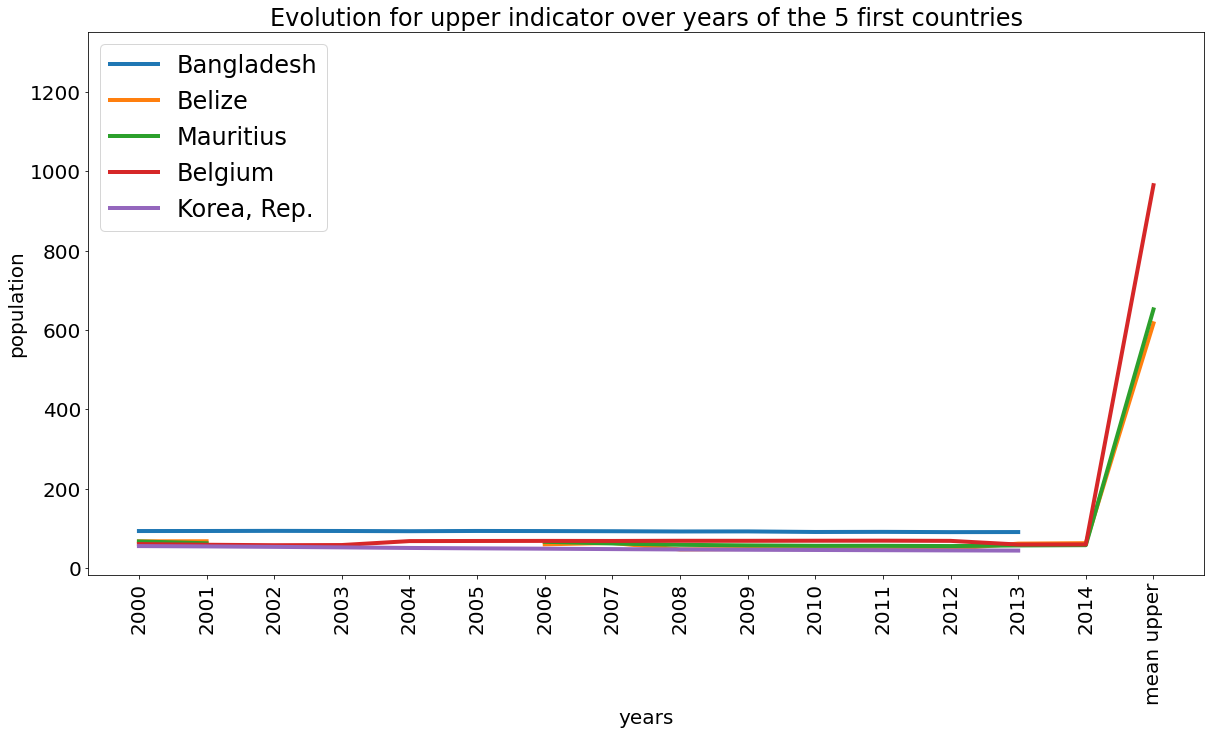

In [207]:
for index in range(5):
    y = df_upper_private_mean.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014'],ascending=False).iloc[index][1:]
    plt.plot(x, 
             y, 
             label = df_upper_private_mean.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014'],ascending=False).iloc[index][0],
             linewidth = 4)
    plt.title("Evolution for upper indicator over years of the 5 first countries")
    plt.xlabel('years')
    plt.xticks(rotation = '90')
    plt.ylabel('population')
    plt.legend(prop = {'size': 24})

In [208]:
df_upper_private_mean = df_upper_private_mean.drop(columns=['2000', '2001', '2002', '2003','2004' ,'2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014'], axis = 0)

In [209]:
df_upper_private_mean.sort_values("mean upper", ascending= False).head(10)
# sort values and check the ten first and ten last countries

,Country Name,mean upper
11,Bangladesh,1289.709869
14,Belgium,965.012764
52,Guatemala,930.167374
76,Lebanon,731.409470
60,Indonesia,730.378178
70,"Korea, Rep.",679.469818
138,United Kingdom,669.980347
87,Mauritius,651.865730
29,Chile,648.087742
15,Belize,616.644981


In [210]:
df_upper_private_mean.sort_values("mean upper", ascending= False).tail(15)

,Country Name,mean upper
123,Suriname,4.47132
128,Tajikistan,2.43360
83,Maldives,2.26525
2,Algeria,1.14002
132,Trinidad and Tobago,0.00000
54,Haiti,0.00000
36,Cuba,0.00000
135,Turkmenistan,0.00000
62,Iraq,0.00000
71,Kosovo,0.00000


## 4)Percentage of enrolment in tertiary education in private institutions

In [211]:
df_indicator["Indicator Name"].value_counts()

Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary    147
Internet users (per 100 people)                                                              147
Percentage of enrolment in secondary education in private institutions (%)                   147
Percentage of enrolment in tertiary education in private institutions (%)                    147
Percentage of enrolment in upper secondary education in private institutions (%)             147
Personal computers (per 100 people)                                                          147
Name: Indicator Name, dtype: int64

In [212]:
df_tertiary = df_indicator.loc[df_indicator["Indicator Name"] =="Percentage of enrolment in tertiary education in private institutions (%)"]

In [213]:
df_tertiary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 1857 to 536947
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              147 non-null    object 
 1   Country Code              147 non-null    object 
 2   Indicator Name            147 non-null    object 
 3   Indicator Code            147 non-null    object 
 4   2000                      53 non-null     float64
 5   2001                      53 non-null     float64
 6   2002                      63 non-null     float64
 7   2003                      64 non-null     float64
 8   2004                      70 non-null     float64
 9   2005                      68 non-null     float64
 10  2006                      68 non-null     float64
 11  2007                      73 non-null     float64
 12  2008                      82 non-null     float64
 13  2009                      84 non-null     float64
 14  2010

In [214]:
df_tertiary.isnull().sum()/df_tertiary.shape[0]*100  # percentage of null in every column

Country Name                 0.000000
Country Code                 0.000000
Indicator Name               0.000000
Indicator Code               0.000000
2000                        63.945578
2001                        63.945578
2002                        57.142857
2003                        56.462585
2004                        52.380952
2005                        53.741497
2006                        53.741497
2007                        50.340136
2008                        44.217687
2009                        42.857143
2010                        41.496599
2011                        36.734694
2012                        40.816327
2013                        31.972789
2014                        34.693878
2015                        39.455782
Region                       0.000000
Income Group                 0.000000
Latest population census     0.000000
dtype: float64

In [215]:
# drop coulmns with more then 50% of null values
df_tertiary = df_tertiary.drop(['2000','2001','2002','2003','2004','2005','2006'], axis = 1)

In [216]:
df_tertiary.describe()## check the mean of all the years

,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,73.000000,82.000000,84.000000,86.000000,93.000000,87.000000,100.000000,96.000000,89.000000
mean,30.545094,33.209589,33.417230,34.186281,31.942985,32.947134,31.192275,29.997944,29.650124
std,26.297794,26.029072,25.405378,27.201940,25.430546,27.200711,25.954741,24.488726,24.508723
min,0.264950,0.659890,0.442120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.769650,13.539960,13.341272,13.599473,13.046040,13.456430,12.242987,12.067157,11.561820
50%,20.078739,26.481625,27.098145,24.604375,23.101480,21.500999,20.083575,18.291470,17.452471
75%,40.285580,44.135206,45.759053,46.026101,45.152489,47.676884,47.797647,43.855258,49.079460
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,92.160080


In [217]:
df_tertiary_mean = df_tertiary.groupby("Country Name").mean() ## group by country name and create a new dataframe with mean values

In [218]:
df_tertiary_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, Afghanistan to Zimbabwe
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2007    73 non-null     float64
 1   2008    82 non-null     float64
 2   2009    84 non-null     float64
 3   2010    86 non-null     float64
 4   2011    93 non-null     float64
 5   2012    87 non-null     float64
 6   2013    100 non-null    float64
 7   2014    96 non-null     float64
 8   2015    89 non-null     float64
dtypes: float64(9)
memory usage: 11.5+ KB


In [219]:
df_tertiary_mean["mean tertiary"] = df_tertiary_mean.sum(axis = 1) # create one column with the sum of all mean years 

In [220]:
df_tertiary_mean = df_tertiary_mean.reset_index(level = 0) 
## transform the index to a column name to use it later for sorting values by values of each country

In [221]:
df_tertiary_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   147 non-null    object 
 1   2007           73 non-null     float64
 2   2008           82 non-null     float64
 3   2009           84 non-null     float64
 4   2010           86 non-null     float64
 5   2011           93 non-null     float64
 6   2012           87 non-null     float64
 7   2013           100 non-null    float64
 8   2014           96 non-null     float64
 9   2015           89 non-null     float64
 10  mean tertiary  147 non-null    float64
dtypes: float64(10), object(1)
memory usage: 12.8+ KB


## check evolution for tetiary indicator for 5 first coutries over years

In [222]:
x = df_tertiary_mean.sort_values(['2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014','2015'],ascending= False).columns[1:]


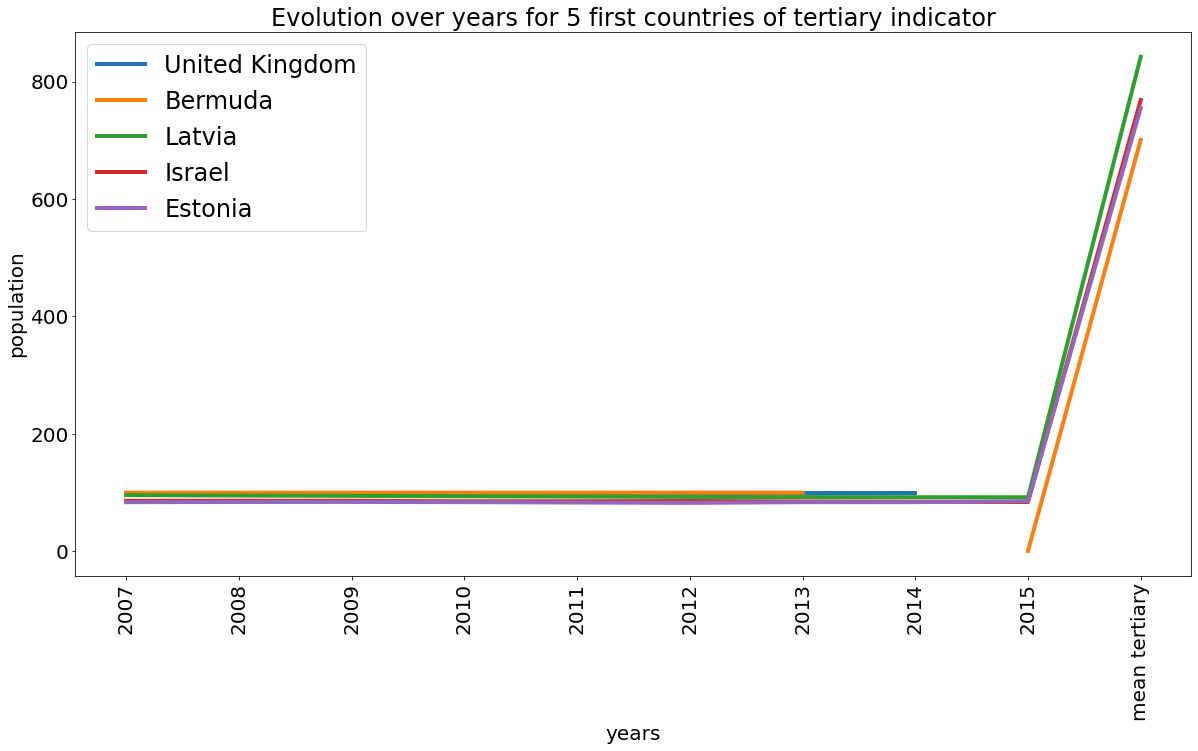

In [223]:
for index in range(5):
    y = df_tertiary_mean.sort_values([ '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014','2015'],ascending=False).iloc[index][1:]
    plt.plot(x, 
             y, 
             label = df_tertiary_mean.sort_values(['2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014','2015'],ascending=False).iloc[index][0],
             linewidth = 4)
    plt.title("Evolution over years for 5 first countries of tertiary indicator")
    plt.xlabel('years')
    plt.xticks(rotation = '90')
    plt.ylabel('population')
    plt.legend(prop = {'size': 24})

In [224]:
df_tertiary_mean = df_tertiary_mean.drop(columns=['2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015'], axis = 0)

In [225]:
df_tertiary_mean.sort_values("mean tertiary", ascending= False).head(10)
# sort values and check the ten first and ten last countries

,Country Name,mean tertiary
75,Latvia,842.174194
138,United Kingdom,800.000000
64,Israel,768.469986
46,Estonia,754.915512
29,Chile,737.800926
70,"Korea, Rep.",724.394600
17,Bermuda,700.719420
67,Japan,631.239731
44,El Salvador,606.585983
37,Cyprus,588.669136


In [226]:
df_tertiary_mean.sort_values("mean tertiary", ascending= False).tail(30)

,Country Name,mean tertiary
119,South Africa,15.08175
99,Nigeria,12.31024
84,Mali,11.89821
124,Swaziland,11.39382
141,Uzbekistan,6.11742
128,Tajikistan,5.08271
85,Malta,4.50781
53,Guyana,0.00000
135,Turkmenistan,0.00000
145,Zambia,0.00000


## 5)Percentage of enrolment in secondary education in private institutions

In [245]:
df_indicator["Indicator Name"].value_counts()

Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary    147
Internet users (per 100 people)                                                              147
Percentage of enrolment in secondary education in private institutions (%)                   147
Percentage of enrolment in tertiary education in private institutions (%)                    147
Percentage of enrolment in upper secondary education in private institutions (%)             147
Personal computers (per 100 people)                                                          147
Name: Indicator Name, dtype: int64

In [246]:
df_secondary = df_indicator.loc[df_indicator["Indicator Name"] =="Percentage of enrolment in secondary education in private institutions (%)"]

In [247]:
df_secondary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 1856 to 536946
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              147 non-null    object 
 1   Country Code              147 non-null    object 
 2   Indicator Name            147 non-null    object 
 3   Indicator Code            147 non-null    object 
 4   2000                      80 non-null     float64
 5   2001                      83 non-null     float64
 6   2002                      93 non-null     float64
 7   2003                      86 non-null     float64
 8   2004                      89 non-null     float64
 9   2005                      95 non-null     float64
 10  2006                      101 non-null    float64
 11  2007                      94 non-null     float64
 12  2008                      99 non-null     float64
 13  2009                      100 non-null    float64
 14  2010

In [248]:
df_secondary.isnull().sum()/df_secondary.shape[0]*100  # percentage of null in every column

Country Name                 0.000000
Country Code                 0.000000
Indicator Name               0.000000
Indicator Code               0.000000
2000                        45.578231
2001                        43.537415
2002                        36.734694
2003                        41.496599
2004                        39.455782
2005                        35.374150
2006                        31.292517
2007                        36.054422
2008                        32.653061
2009                        31.972789
2010                        28.571429
2011                        23.809524
2012                        28.571429
2013                        26.530612
2014                        29.251701
2015                        37.414966
Region                       0.000000
Income Group                 0.000000
Latest population census     0.000000
dtype: float64

In [249]:
df_secondary.describe()## check the mean of all the years

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,80.000000,83.000000,93.000000,86.000000,89.000000,95.000000,101.000000,94.000000,99.000000,100.000000,105.000000,112.000000,105.000000,108.000000,104.000000,92.000000
mean,16.185241,17.736753,17.084801,14.967448,16.144842,15.973626,17.617757,17.775643,18.168326,17.692787,17.832222,17.496138,18.076672,18.254153,18.601864,19.072458
std,18.148727,18.943989,18.600801,16.024112,16.974023,16.780459,18.043297,19.168836,18.407534,18.031015,17.636083,17.403724,18.198085,17.900695,17.853101,18.589796
min,0.000000,0.244080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.169460,0.134480,0.077140,0.271400,0.000000,0.013610,0.040780,0.036650
25%,4.717075,4.494340,4.430160,3.957790,4.690370,4.386890,4.804600,4.043347,5.598265,5.608825,5.559830,4.767117,5.919230,6.195790,5.613445,5.823235
50%,10.074470,11.938230,11.170920,10.133260,10.903180,11.636910,12.894720,12.904270,13.517500,12.745825,13.253690,12.562690,13.305840,12.962550,12.902930,13.584900
75%,23.962630,25.061404,24.075319,23.504217,22.742041,23.997935,25.235870,25.385773,24.955324,22.984832,24.246040,24.496868,23.379629,24.074165,26.045733,28.548213
max,95.731720,95.895073,96.052803,95.915833,95.686783,95.991837,95.824287,95.631042,95.267578,95.325043,95.114578,94.791496,94.457443,94.591690,70.737297,94.433029


In [250]:
df_secondary_mean = df_secondary.groupby("Country Name").mean() 
## group by country name and create a new dataframe with mean values

In [251]:
df_secondary_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, Afghanistan to Zimbabwe
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    80 non-null     float64
 1   2001    83 non-null     float64
 2   2002    93 non-null     float64
 3   2003    86 non-null     float64
 4   2004    89 non-null     float64
 5   2005    95 non-null     float64
 6   2006    101 non-null    float64
 7   2007    94 non-null     float64
 8   2008    99 non-null     float64
 9   2009    100 non-null    float64
 10  2010    105 non-null    float64
 11  2011    112 non-null    float64
 12  2012    105 non-null    float64
 13  2013    108 non-null    float64
 14  2014    104 non-null    float64
 15  2015    92 non-null     float64
dtypes: float64(16)
memory usage: 19.5+ KB


In [252]:
df_secondary_mean["mean secondary"] = df_secondary_mean.sum(axis = 1) # create one column with the sum of all mean years 

In [253]:
df_secondary_mean = df_secondary_mean.reset_index(level = 0) 
## transform the index to a column name to use it later for sorting values by values of each country

In [254]:
df_secondary_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    147 non-null    object 
 1   2000            80 non-null     float64
 2   2001            83 non-null     float64
 3   2002            93 non-null     float64
 4   2003            86 non-null     float64
 5   2004            89 non-null     float64
 6   2005            95 non-null     float64
 7   2006            101 non-null    float64
 8   2007            94 non-null     float64
 9   2008            99 non-null     float64
 10  2009            100 non-null    float64
 11  2010            105 non-null    float64
 12  2011            112 non-null    float64
 13  2012            105 non-null    float64
 14  2013            108 non-null    float64
 15  2014            104 non-null    float64
 16  2015            92 non-null     float64
 17  mean secondary  147 non-null    flo

## check evolution for secondary indicator for 5 first coutries over years

In [255]:
x = df_secondary_mean.sort_values(['2000','2001','2002',
       '2003', '2004','2005','2006','2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014','2015'],ascending= False).columns[1:]


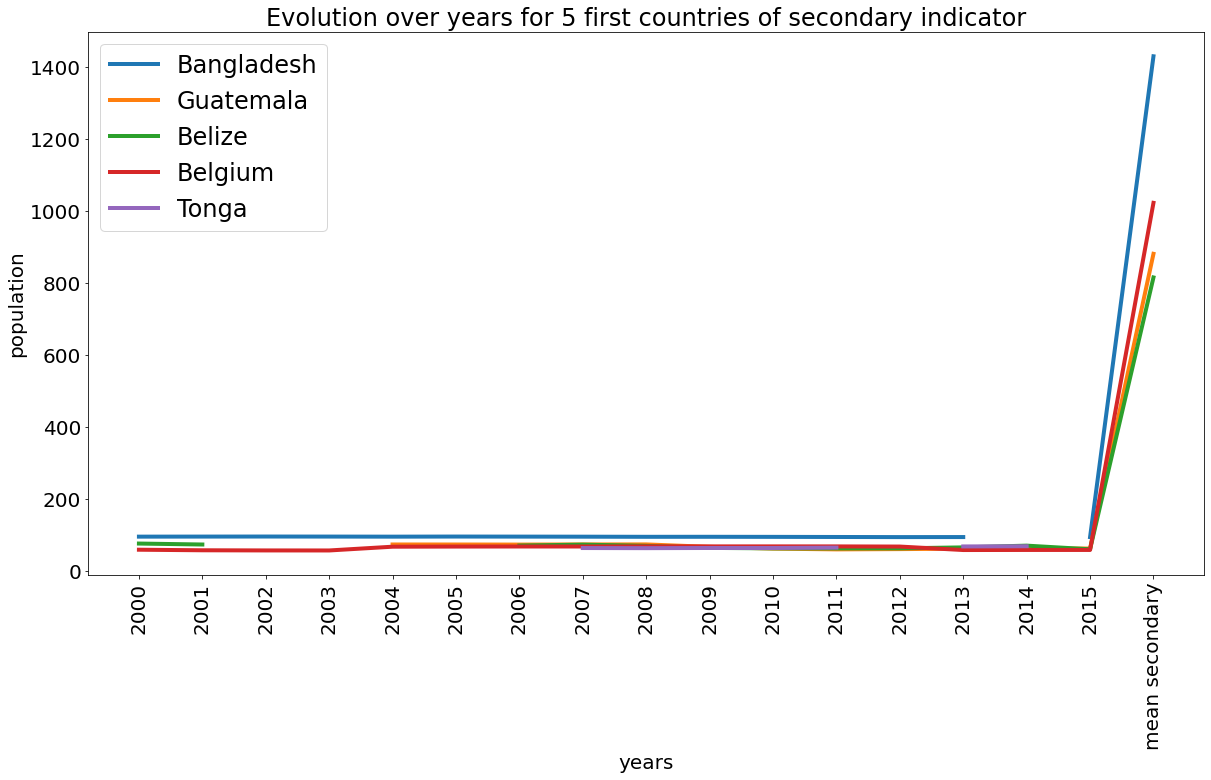

In [256]:
for index in range(5):
    y = df_secondary_mean.sort_values([ '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014','2015'],ascending=False).iloc[index][1:]
    plt.plot(x, 
             y, 
             label = df_secondary_mean.sort_values(['2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014','2015'],ascending=False).iloc[index][0],
             linewidth = 4)
    plt.title("Evolution over years for 5 first countries of secondary indicator")
    plt.xlabel('years')
    plt.xticks(rotation = '90')
    plt.ylabel('population')
    plt.legend(prop = {'size': 24})

In [257]:
df_secondary_mean = df_secondary_mean.drop(columns=['2000', '2001', '2002', '2003', '2005','2004' ,'2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015'], axis = 0)

In [258]:
df_secondary_mean.sort_values("mean secondary", ascending= False).head(10)
# sort values and check the ten first and ten last countries

,Country Name,mean secondary
11,Bangladesh,1430.710236
14,Belgium,1023.383457
76,Lebanon,915.933586
52,Guatemala,881.737568
15,Belize,816.057121
87,Mauritius,797.444016
29,Chile,672.376797
60,Indonesia,642.676620
109,Qatar,551.369272
70,"Korea, Rep.",534.961472


In [259]:
df_secondary_mean.sort_values("mean secondary", ascending= False).tail(15)

,Country Name,mean secondary
128,Tajikistan,2.31986
2,Algeria,0.80935
141,Uzbekistan,0.09104
145,Zambia,0.00000
143,Vietnam,0.00000
9,Azerbaijan,0.00000
118,Somalia,0.00000
137,United Arab Emirates,0.00000
36,Cuba,0.00000
49,Gabon,0.00000


## concat the dataset by indicator

In [260]:
frames = [df_computer_mean, df_internet_mean, df_secondary_mean, df_upper_private_mean, df_tertiary_mean]

In [261]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on='Country Name'),frames)

In [262]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    147 non-null    object 
 1   mean computer   147 non-null    float64
 2   mean internet   147 non-null    float64
 3   mean secondary  147 non-null    float64
 4   mean upper      147 non-null    float64
 5   mean tertiary   147 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.0+ KB


In [263]:
df_merged.head(20)

,Country Name,mean computer,mean internet,mean secondary,mean upper,mean tertiary
0,Afghanistan,0.732051,46.438801,7.872380,4.571100,43.114368
1,Albania,11.025083,429.181155,59.815200,106.705480,144.662731
2,Algeria,4.757978,189.440413,0.809350,1.140020,0.000000
3,Andorra,0.000000,903.410709,40.652680,51.983990,22.407400
4,Angola,1.617805,53.790300,42.720660,41.963401,157.046169
5,Argentina,48.263890,526.802101,385.380798,424.693392,210.970062
6,Armenia,23.779422,302.907404,8.460690,8.909490,24.525849
7,Australia,214.490415,930.317096,405.990801,367.835367,57.367090
8,Austria,300.221330,1023.240337,142.308492,146.812480,98.293109
9,Azerbaijan,10.276815,459.695606,0.000000,308.068501,110.964681


In [264]:
df_merged.to_csv('Country_Mean_Indicator_Per_Year.csv', index= False) ## transform df in csv file